In [35]:
using Plots
using StatsBase
using Distributions
using StatsFuns
using KernelDensity
using Statistics
using StatsPlots
using CSV
using DataFrames
using LaTeXStrings
using LsqFit
using DelimitedFiles
using HypothesisTests

In [95]:
function pMA(X, p)
    S = Float64[]
    for i in p+1 : length(X)-p
        s = mean(X[i-p:i+p])
        append!(S, s)
    end
    return S
end


function regression(X, Y, display_plot=false)
    r = cor(X, Y)
    Sx = std(X)
    Sy = std(Y)
    a = r * Sy / Sx
    b = mean(Y) - a * mean(X)

    if display_plot
        scatter(X, Y, ms=2, markerstrokewidth=0.5, alpha=0.5)
        xs = minimum(X):0.01:maximum(X)
        plot!(xs, a .* xs .+ b, c=:red, lw=2) |> display
    end

    return [a, b]
end


function RSP(X, Y)
    C = cumsum(Y.^2)
    n = length(X)
    es = Float64[]
    for k in 2:n-2
        X1 = X[1:k]
        X2 = X[k+1:n]
        C1 = C[1:k]
        C2 = C[k+1:n]
        a1, b1 = regression(X1, C1, false)
        a2, b2 = regression(X2, C2, false)
        e = sum((C1 .- a1 .* X1 .- b1).^2) + sum((C2 .- a2 .* X2 .- b2).^2)
        append!(es, e)
    end
    return X[argmin(es) + 1]
end


quadrant_cor(X, h) = 1 / (length(X) - h) * sum( [sign((X[i] - median(X)) * (X[i+h] - median(X))) for i in 1:length(X)-h] )

quadrant_cor (generic function with 1 method)

In [3]:
data = CSV.read("data/data.csv", DataFrame)

,day_number,region,country,state,city,month,day,year,temp
,Int64,String,String,Missing,String,Int64,Int64,Int64,Float64
1,1,Europe,Poland,missing,Warsaw,1,1,1995,35.4
2,2,Europe,Poland,missing,Warsaw,1,2,1995,30.5
3,3,Europe,Poland,missing,Warsaw,1,3,1995,27.2
4,4,Europe,Poland,missing,Warsaw,1,4,1995,22.9
5,5,Europe,Poland,missing,Warsaw,1,5,1995,18.7
6,6,Europe,Poland,missing,Warsaw,1,6,1995,19.7
7,7,Europe,Poland,missing,Warsaw,1,7,1995,21.6
8,8,Europe,Poland,missing,Warsaw,1,8,1995,26.6
9,9,Europe,Poland,missing,Warsaw,1,9,1995,27.4


In [4]:
temp = data[!, "temp"][2730:4622]
day = 1:length(temp)

1:1893

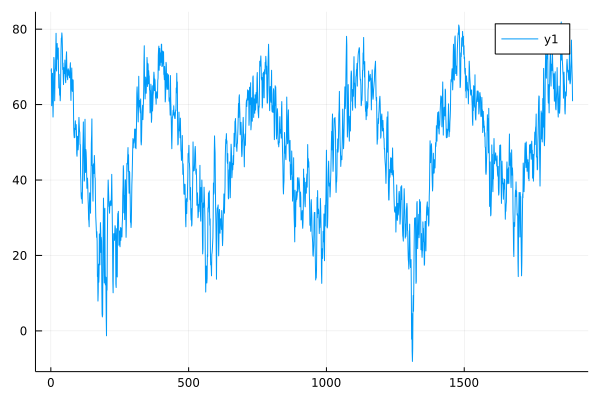

In [6]:
plot(temp)

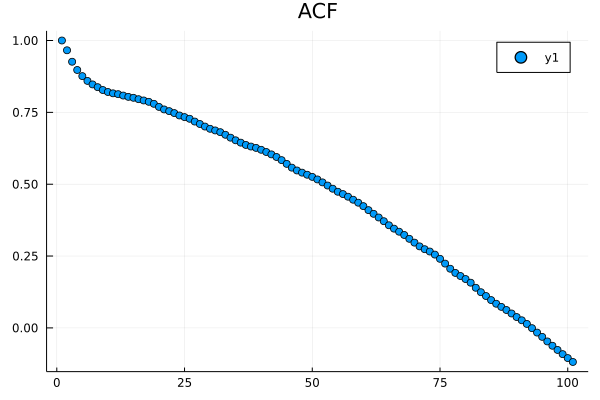

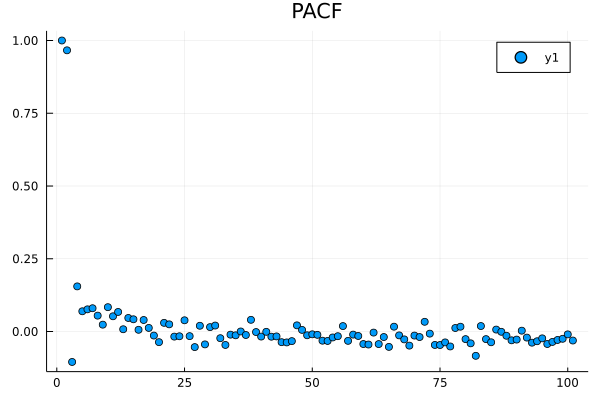

In [82]:
scatter(autocor(temp, 0:100), title="ACF") |> display
scatter(pacf(temp, 0:100), title="PACF")

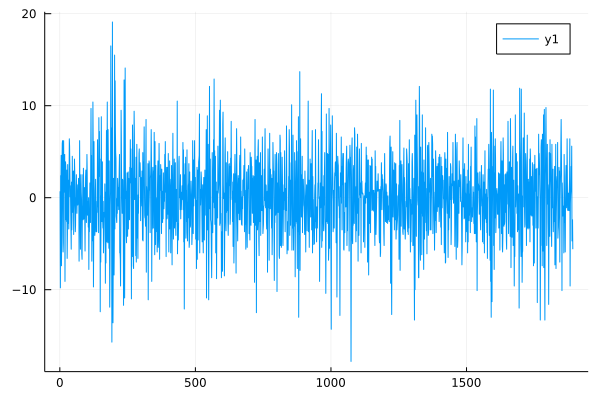

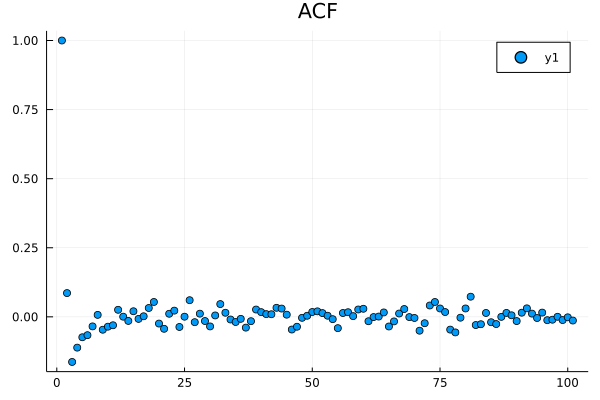

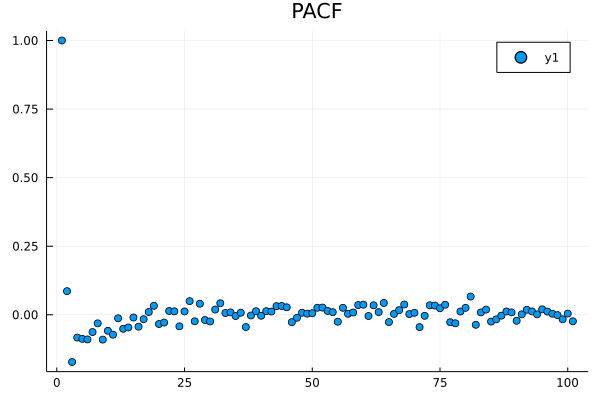

In [102]:
temp_diff = temp[366:end] .- temp[1:end-365]
temp_diff = temp[2:end] .- temp[1:end-1]
#temp_diff = temp_diff[2:end] .- temp_diff[1:end-1]
plot(temp_diff) |> display
scatter(autocor(temp_diff, 0:100), title="ACF") |> display
scatter(pacf(temp_diff, 0:100), title="PACF")

In [108]:
ADFTest(temp_diff, :constant, 5)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          -1.46113

Test summary:
    outcome with 95% confidence: reject h_0
    p-value:                     <1e-99

Details:
    sample size in regression:          1886
    number of lags:                     5
    ADF statistic:                      -22.9507
    Critical values at 1%, 5%, and 10%: [-3.43381 -2.86307 -2.56758]


In [ ]:
M = 1000

ρ_matrix = zeros(M, 7)

for j in 1:M
    
    Xt = Float64[]
    Xi = 0
    for i in 1:n
        Xi = ϕ * Xi + rand(Normal(0, σ))
        append!(Xt, Xi)
    end

    ρ_s = ρ_.(Ref(Xt), hs)
    ρ_matrix[j,:] = ρ_s
end

q_d = Float64[]
q_g = Float64[]
for i in hs.+1
    append!(q_d, quantile(ρ_matrix[:,i], α/2))
    append!(q_g, quantile(ρ_matrix[:,i], 1 - α/2))
end

$$ \alpha \sin (\omega t + \beta) + \delta $$

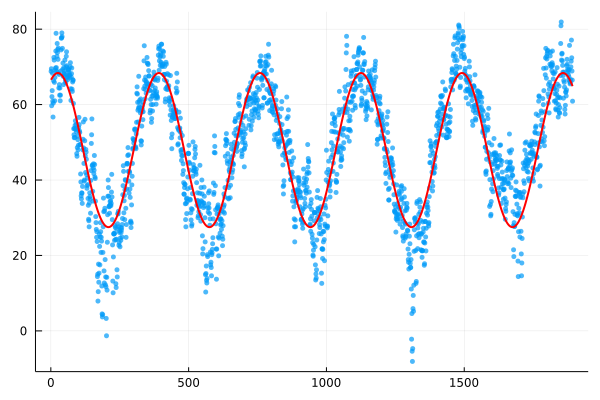

α = 20.431605091549752
ω = 0.017141038294264617
β = 202.19403941849296
δ = 47.93793730426753


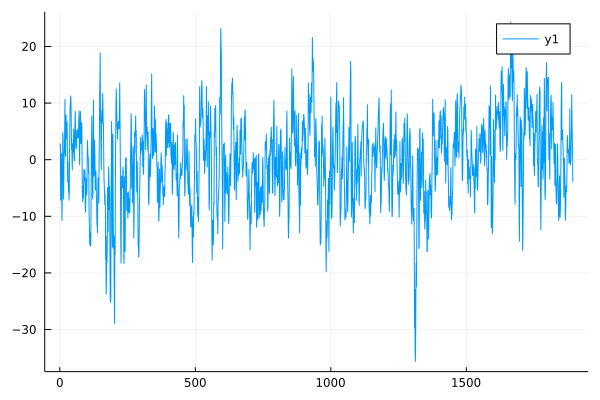

In [100]:
X = day
Y = temp

f_mod(t, p) = p[1] .* sin.(p[2] .* t .+ p[3]) .+ p[4]
f_fit = curve_fit(f_mod, X, Y, [40.0, 0.02, 200.0, 40.0])

xs = minimum(X):0.1:maximum(X)
scatter(X, Y, ms=3, alpha=0.7, markerstrokewidth=0, legend=false)
plot!(xs, f_mod(xs, f_fit.param), lw=2, c=:red) |> display

symbols = ["α", "ω", "β", "δ"]
for param in zip(symbols, f_fit.param) 
    println(param[1], " = ", param[2])
end

p_temp = Y .- f_mod(X, f_fit.param)
plot(p_temp)

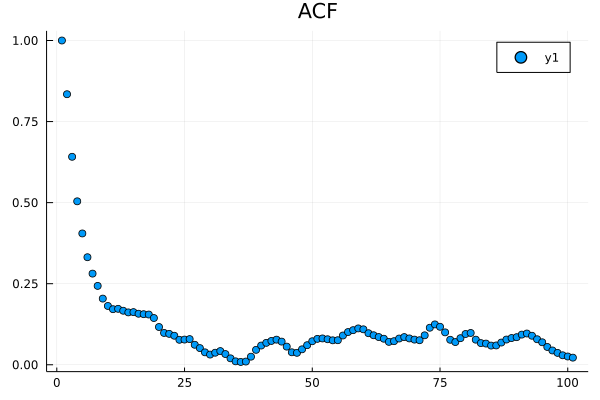

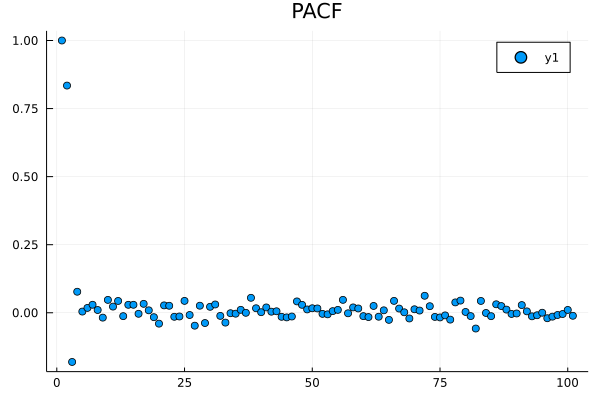

In [99]:
scatter(autocor(p_temp, 0:100), title="ACF") |> display
scatter(pacf(p_temp, 0:100), title="PACF")

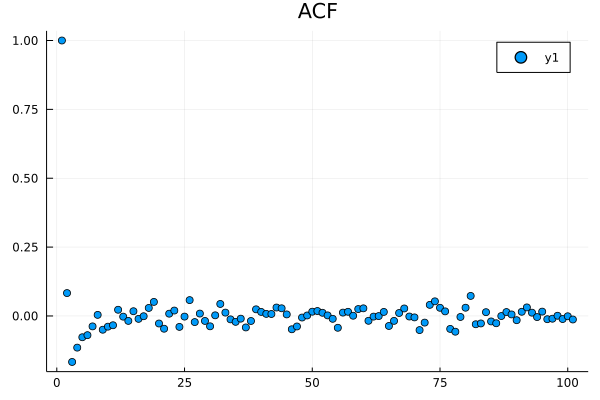

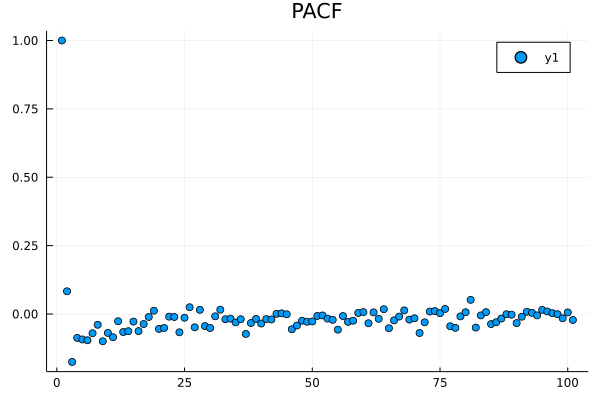

In [101]:
p_temp_diff = p_temp[2:end] .- p_temp[1:end-1]
scatter(autocor(p_temp_diff, 0:100), title="ACF") |> display
scatter(pacf(p_temp_diff, 0:100), title="PACF")